**Stroke Prediction Dataset**

**Introduction**
This is a collection of different scripts used to compile the prediction model.

In [65]:
import pandas as pd
import numpy as np

imports modules used

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


allows access to drive

In [67]:
df = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/healthcare-dataset-stroke-data.csv')

accessing dataset csv

In [68]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


visual representation of dataset showing it is successfully accessed.

**1. Dataset indentification**

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


shows all information of the dataset.

In [70]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


description of dataset.

In [71]:
df.shape

(5110, 12)

this is the amount of records (5110) and columns (12) in the dataset.

In [72]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

list of attributes.

In [73]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

shows the datatypes of the attributes

In [74]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


first five rows showing all attributes and example data (head).

**2. Exploratory Data Analysis (EDA)**

In [75]:
from sklearn.model_selection import train_test_split

**2.2 Splitting the dataset**

allows dataset to be used for training, testing and validation.

In [76]:
X = df.drop(columns='stroke', axis = 1)

defining x

In [77]:
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [78]:
Y = df['stroke']

defining y

In [79]:
X_tmp, X_test, Y_tmp, Y_test = train_test_split(X, Y ,test_size = 0.10, random_state= 42)

splliting dataset 90/10

In [80]:
X_train, X_val, Y_train, Y_val = train_test_split(X_tmp, Y_tmp ,test_size = 0.10, random_state= 42)

resplitting

In [81]:
X_train.shape

(4139, 11)

In [82]:
X_val.shape

(460, 11)

In [83]:
X_test.shape

(511, 11)

In [84]:
df_val = X_val
df_val['stroke'] = Y_val


creating dataframes

In [85]:
df_train = X_train
df_train['stroke'] = Y_train

creating dataframes

In [86]:
df_test = X_test
df_test['stroke'] = Y_test

creating dataframes

# **2.3 Analysis for hypothesis**

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

Imports libraries needed to make visual representations of the data.

 **Q1**

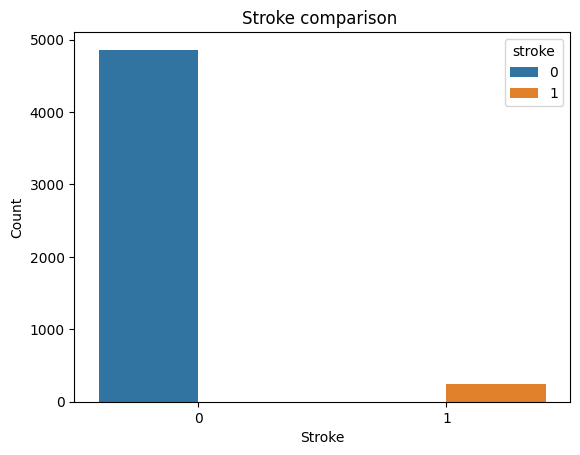

In [88]:
sns.countplot(data=df, x="stroke", hue="stroke")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.title("Stroke comparison ")

plt.show()

In [89]:
s_count = df_train["stroke"].value_counts()

print("people who have had stroke in the training dataset " + str(s_count[1]))

people who have had stroke in the training dataset 201


**Q2**

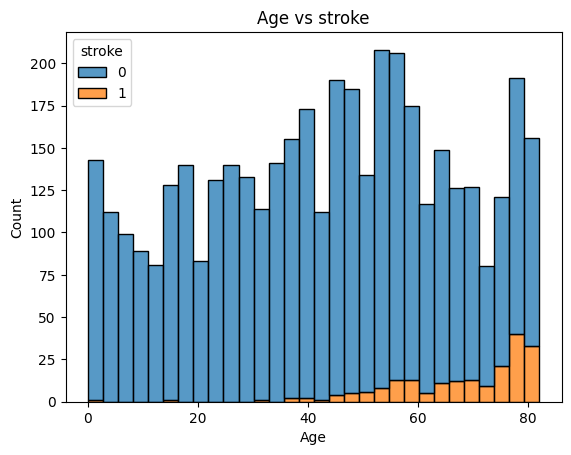

In [90]:
sns.histplot(data=df_train, x="age", hue="stroke", multiple="stack", bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age vs stroke")
plt.show()


**Q3**

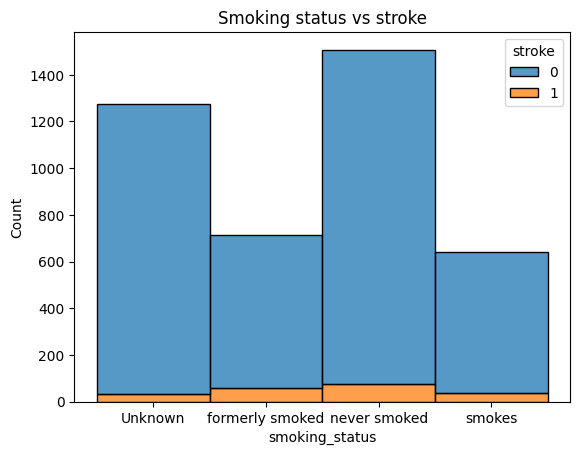

In [91]:
sns.histplot(data=df_train, x="smoking_status", hue="stroke", multiple="stack", bins=30)
plt.xlabel("smoking_status")
plt.ylabel("Count")
plt.title("Smoking status vs stroke")
plt.show()

**Q4**

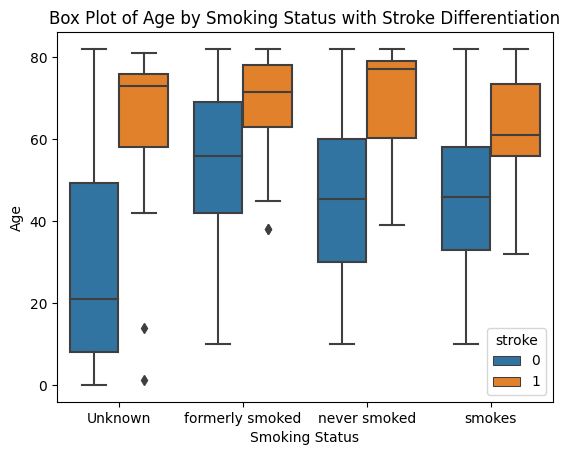

In [92]:
sns.boxplot(data=df_train, x="smoking_status", y="age", hue="stroke")

# Adding labels and title for better visualization
plt.xlabel("Smoking Status")
plt.ylabel("Age")
plt.title("Box Plot of Age by Smoking Status with Stroke Differentiation")

# Show the plot
plt.show()

**Q5**

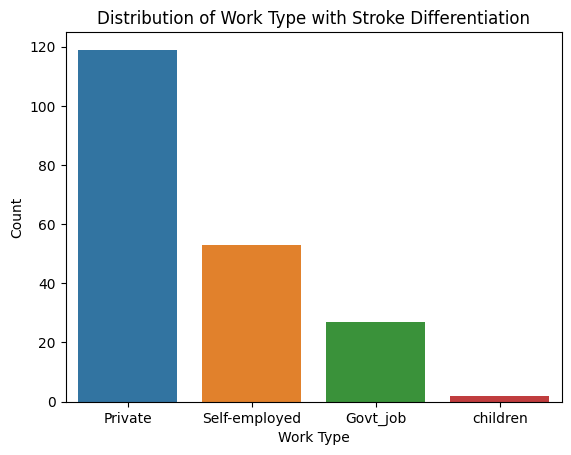

In [ ]:

df_stroke_y= df_train[df_train['stroke'] == 1]
sns.countplot(data=df_stroke_y, x="work_type")

# Adding labels and title for better visualization
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.title("Distribution of Work Type with Stroke Differentiation")

# Show the plot
plt.show()

**Q6**

<Axes: xlabel='ever_married', ylabel='count'>

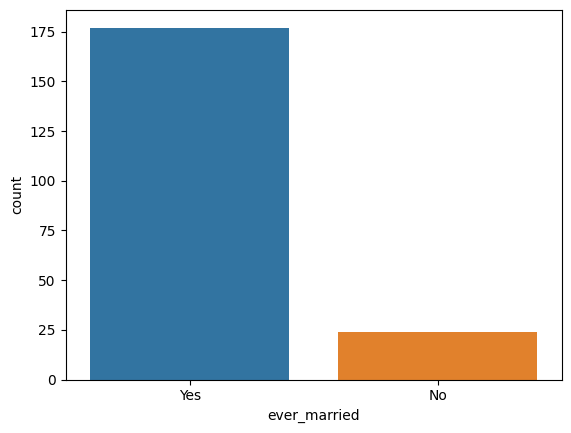

In [ ]:
sns.countplot(data=df_stroke_y, x="ever_married")

people who have stroke in the married section this suggests married people have more chances of getting a stroke.

**Q7**

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

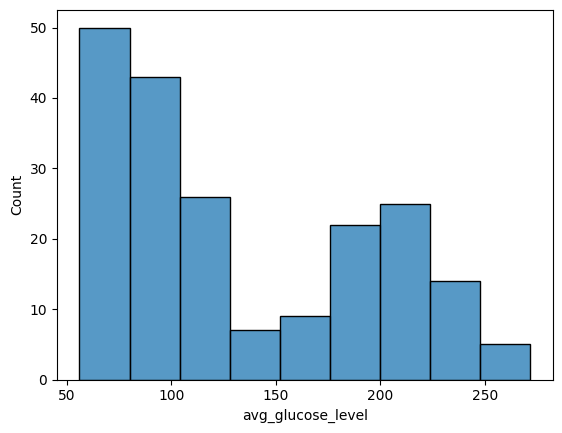

In [ ]:
sns.histplot(data=df_stroke_y, x="avg_glucose_level")

**Q8**

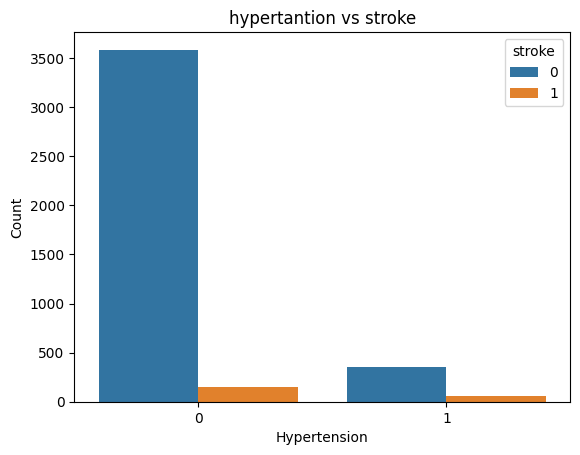

In [ ]:
sns.countplot(data=df_train, x="hypertension", hue="stroke")

# Adding labels and title for better visualization
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.title("hypertantion vs stroke")

# Show the plot
plt.show()

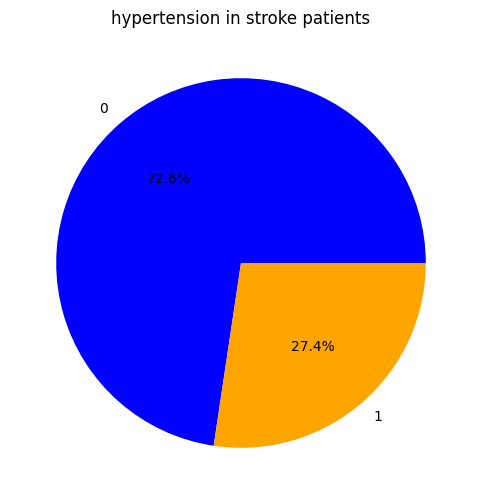

In [ ]:
df_hypertension_s = df_stroke_y['hypertension'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(df_hypertension_s, labels=df_hypertension_s.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title("hypertension in stroke patients")

plt.show()

**preprocessing training dataset**

In [ ]:
df_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1108,56734,Male,33.0,0,0,Yes,Govt_job,Urban,82.83,25.4,Unknown,0
3684,25676,Female,7.0,0,0,No,children,Rural,89.38,19.0,Unknown,0
3419,39017,Female,72.0,0,0,Yes,Govt_job,Rural,118.22,21.9,formerly smoked,0
3443,2730,Male,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked,0
31,33879,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2777,15533,Male,46.0,0,0,No,Private,Urban,107.59,26.2,formerly smoked,0
2492,65324,Female,48.0,0,0,Yes,Govt_job,Rural,75.91,27.8,Unknown,0
3625,40210,Male,78.0,0,1,Yes,Self-employed,Rural,206.62,28.0,formerly smoked,0
2136,59745,Female,27.0,0,0,Yes,Private,Urban,76.74,53.9,Unknown,0


unprocessed data

In [ ]:
df_train = df_train.drop("id", axis = 1)

removing id column

In [ ]:
df_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1108,Male,33.0,0,0,Yes,Govt_job,Urban,82.83,25.4,Unknown,0
3684,Female,7.0,0,0,No,children,Rural,89.38,19.0,Unknown,0
3419,Female,72.0,0,0,Yes,Govt_job,Rural,118.22,21.9,formerly smoked,0
3443,Male,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked,0
31,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
2777,Male,46.0,0,0,No,Private,Urban,107.59,26.2,formerly smoked,0
2492,Female,48.0,0,0,Yes,Govt_job,Rural,75.91,27.8,Unknown,0
3625,Male,78.0,0,1,Yes,Self-employed,Rural,206.62,28.0,formerly smoked,0
2136,Female,27.0,0,0,Yes,Private,Urban,76.74,53.9,Unknown,0


dataset without id column

In [ ]:
df_train.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  164
smoking_status         0
stroke                 0
dtype: int64

checking for any missing values

In [ ]:
df_train.dropna(inplace = True)

164 misssing values for bmi dropping any rows with missing values

In [ ]:
df_train.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

No missing values

In [ ]:
df_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1108,Male,33.0,0,0,Yes,Govt_job,Urban,82.83,25.4,Unknown,0
3684,Female,7.0,0,0,No,children,Rural,89.38,19.0,Unknown,0
3419,Female,72.0,0,0,Yes,Govt_job,Rural,118.22,21.9,formerly smoked,0
3443,Male,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked,0
31,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
2777,Male,46.0,0,0,No,Private,Urban,107.59,26.2,formerly smoked,0
2492,Female,48.0,0,0,Yes,Govt_job,Rural,75.91,27.8,Unknown,0
3625,Male,78.0,0,1,Yes,Self-employed,Rural,206.62,28.0,formerly smoked,0
2136,Female,27.0,0,0,Yes,Private,Urban,76.74,53.9,Unknown,0


Dataset with no missing values

In [ ]:
df_train = df_train.replace('Unknown',pd.NA)

making any unknown values in smoking_status NA

In [ ]:
df_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1108,Male,33.0,0,0,Yes,Govt_job,Urban,82.83,25.4,<NA>,0
3684,Female,7.0,0,0,No,children,Rural,89.38,19.0,<NA>,0
3419,Female,72.0,0,0,Yes,Govt_job,Rural,118.22,21.9,formerly smoked,0
3443,Male,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked,0
31,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...
2777,Male,46.0,0,0,No,Private,Urban,107.59,26.2,formerly smoked,0
2492,Female,48.0,0,0,Yes,Govt_job,Rural,75.91,27.8,<NA>,0
3625,Male,78.0,0,1,Yes,Self-employed,Rural,206.62,28.0,formerly smoked,0
2136,Female,27.0,0,0,Yes,Private,Urban,76.74,53.9,<NA>,0


checking vales have been made NA

In [ ]:
df_train.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1222
stroke                  0
dtype: int64

In [ ]:
df_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1108,Male,33.0,0,0,Yes,Govt_job,Urban,82.83,25.4,<NA>,0
3684,Female,7.0,0,0,No,children,Rural,89.38,19.0,<NA>,0
3419,Female,72.0,0,0,Yes,Govt_job,Rural,118.22,21.9,formerly smoked,0
3443,Male,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked,0
31,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...
2777,Male,46.0,0,0,No,Private,Urban,107.59,26.2,formerly smoked,0
2492,Female,48.0,0,0,Yes,Govt_job,Rural,75.91,27.8,<NA>,0
3625,Male,78.0,0,1,Yes,Self-employed,Rural,206.62,28.0,formerly smoked,0
2136,Female,27.0,0,0,Yes,Private,Urban,76.74,53.9,<NA>,0


In [ ]:
df_train = pd.get_dummies(data=df_train, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

One-Hot encoding data

In [ ]:
df_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1108,33.0,0,0,82.83,25.4,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0
3684,7.0,0,0,89.38,19.0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0
3419,72.0,0,0,118.22,21.9,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0
3443,58.0,0,0,94.53,36.1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
31,42.0,0,0,83.41,25.4,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,107.59,26.2,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0
2492,48.0,0,0,75.91,27.8,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0
3625,78.0,0,1,206.62,28.0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
2136,27.0,0,0,76.74,53.9,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0


Checking data is encoded

In [ ]:
df_train.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

No missing values

In [ ]:
df_train.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

Checking data types are all numerical

**preprocessing test dataset**

In [ ]:
df_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4688,40041,Male,31.0,0,0,No,Self-employed,Rural,64.85,23.0,Unknown,0
4478,55244,Male,40.0,0,0,Yes,Self-employed,Rural,65.29,28.3,never smoked,0
3849,70992,Female,8.0,0,0,No,children,Urban,74.42,22.5,Unknown,0
4355,38207,Female,79.0,1,0,Yes,Self-employed,Rural,76.64,19.5,never smoked,0
3826,8541,Female,75.0,0,0,Yes,Govt_job,Rural,94.77,27.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
1833,34958,Male,14.0,0,0,No,children,Urban,92.86,20.7,formerly smoked,0
3411,15104,Female,26.0,0,0,Yes,Private,Rural,88.79,24.9,never smoked,0
350,28333,Female,79.0,1,1,Yes,Self-employed,Urban,200.28,30.0,formerly smoked,0


shows the df_test dataset without it being processed.

In [ ]:
df_test = df_test.drop("id", axis = 1)
df_test.isna().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  23
smoking_status        0
stroke                0
dtype: int64

In [ ]:
df_test.dropna(inplace = True)
df_test.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4688,Male,31.0,0,0,No,Self-employed,Rural,64.85,23.0,Unknown,0
4478,Male,40.0,0,0,Yes,Self-employed,Rural,65.29,28.3,never smoked,0
3849,Female,8.0,0,0,No,children,Urban,74.42,22.5,Unknown,0
4355,Female,79.0,1,0,Yes,Self-employed,Rural,76.64,19.5,never smoked,0
3826,Female,75.0,0,0,Yes,Govt_job,Rural,94.77,27.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
1833,Male,14.0,0,0,No,children,Urban,92.86,20.7,formerly smoked,0
3411,Female,26.0,0,0,Yes,Private,Rural,88.79,24.9,never smoked,0
350,Female,79.0,1,1,Yes,Self-employed,Urban,200.28,30.0,formerly smoked,0


In [ ]:
df_test = df_test.replace('Unknown',pd.NA)

In [ ]:
df_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4688,Male,31.0,0,0,No,Self-employed,Rural,64.85,23.0,<NA>,0
4478,Male,40.0,0,0,Yes,Self-employed,Rural,65.29,28.3,never smoked,0
3849,Female,8.0,0,0,No,children,Urban,74.42,22.5,<NA>,0
4355,Female,79.0,1,0,Yes,Self-employed,Rural,76.64,19.5,never smoked,0
3826,Female,75.0,0,0,Yes,Govt_job,Rural,94.77,27.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
1833,Male,14.0,0,0,No,children,Urban,92.86,20.7,formerly smoked,0
3411,Female,26.0,0,0,Yes,Private,Rural,88.79,24.9,never smoked,0
350,Female,79.0,1,1,Yes,Self-employed,Urban,200.28,30.0,formerly smoked,0


In [ ]:
df_test = pd.get_dummies(data=df_test, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [ ]:
df_train.shape

(3975, 20)

In [ ]:
df_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4688,31.0,0,0,64.85,23.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0
4478,40.0,0,0,65.29,28.3,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
3849,8.0,0,0,74.42,22.5,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4355,79.0,1,0,76.64,19.5,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
3826,75.0,0,0,94.77,27.2,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,70.0,0,0,69.04,35.9,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0
1833,14.0,0,0,92.86,20.7,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0
3411,26.0,0,0,88.79,24.9,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
350,79.0,1,1,200.28,30.0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0


In [ ]:
df_test.shape

(488, 20)

In [ ]:
df_test.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
work_type_Govt_job                  uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

**Ensuring test dataframe attributes match train dataframe**

In [ ]:
count = 0
attributes = []

while count < len(X_train.columns) and count < len(X_test.columns):
    if X_train.columns[count] == X_test.columns[count]:
        attributes.append(X_test.columns[count])
    count += 1

print(attributes)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


this gets all common attributes


In [ ]:
print(len(attributes))

12


In [ ]:
df_train.shape

(3975, 20)

these values show that attributes are missing

In [ ]:
X_train.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
X_test = X_test
for column in X_train.columns:
    if column not in X_test.columns:
        X_test[column] = X_train[column]



In [ ]:
X_test.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
X_test.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
X_test = X_test.drop(columns=['gender_Other'])

KeyError: "['gender_Other'] not found in axis"

In [ ]:
X_test = X_test[X_train.columns]

In [ ]:
X_test.shape

(511, 12)

**4. Training model**

the model I have chosen for this section is KNN which is further explained on the report.

In [ ]:
df_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1108,33.0,0,0,82.83,25.4,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0
3684,7.0,0,0,89.38,19.0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0
3419,72.0,0,0,118.22,21.9,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0
3443,58.0,0,0,94.53,36.1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
31,42.0,0,0,83.41,25.4,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0


head of df_train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

this installs the module needed for the KNN model


In [ ]:
df_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1108,33.0,0,0,82.83,25.4,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0
3684,7.0,0,0,89.38,19.0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0
3419,72.0,0,0,118.22,21.9,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0
3443,58.0,0,0,94.53,36.1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
31,42.0,0,0,83.41,25.4,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,107.59,26.2,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0
2492,48.0,0,0,75.91,27.8,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0
3625,78.0,0,1,206.62,28.0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
2136,27.0,0,0,76.74,53.9,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0


as it is shown that the df_train contains stroke.

In [ ]:
Y_train = df_train['stroke']
X_train= df_train.drop(labels= ["stroke"], axis = 1)



In [ ]:
Y_test = df_test['stroke']
X_test= df_test.drop(labels= ["stroke"], axis = 1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

model is fitted.

**Prediction**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_pred = knn.predict(X_train)

In [ ]:
conf_matrix_result = confusion_matrix(Y_train, y_pred)
class_report = classification_report(Y_train, y_pred)
accuracy = accuracy_score(Y_train, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix_result)
print("Classification Report:")
print(class_report)

Accuracy: 0.9592452830188679
Confusion Matrix:
[[3802    6]
 [ 156   11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3808
           1       0.65      0.07      0.12       167

    accuracy                           0.96      3975
   macro avg       0.80      0.53      0.55      3975
weighted avg       0.95      0.96      0.94      3975



prediction accuracy of seen data
